# Simulation Results: Temperature

Comparison of simulated and observed temperature

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
SIM_ROOT = "DC_WGMN3"
TMAX_DATA_ROOT = "%s_H0Data_Tmax.xlsx"
TMIN_DATA_ROOT = "%s_H0Data_Tmin.xlsx"
TMAX_PROJ_ROOT = "%s_H1CProj%d_Tmax.xlsx"
TMIN_PROJ_ROOT = "%s_H1CProj%d_Tmin.xlsx"
DP_WET_SMOOTH_IN = "OWeath_Wet_Smooth_Ave_1981-2010.pickle"
DP_DRY_SMOOTH_IN = "OWeath_Dry_Smooth_Ave_1981-2010.pickle"
P1_WET_SMOOTH_IN = "OWeath_LOCA_Wet_Smooth_Ave_2011-2040.pickle"
P1_DRY_SMOOTH_IN = "OWeath_LOCA_Dry_Smooth_Ave_2011-2040.pickle"
P2_WET_SMOOTH_IN = "OWeath_LOCA_Wet_Smooth_Ave_2041-2070.pickle"
P2_DRY_SMOOTH_IN = "OWeath_LOCA_Dry_Smooth_Ave_2041-2070.pickle"
P3_WET_SMOOTH_IN = "OWeath_LOCA_Wet_Smooth_Ave_2071-2100.pickle"
P3_DRY_SMOOTH_IN = "OWeath_LOCA_Dry_Smooth_Ave_2071-2100.pickle"

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

In [5]:
SM_NUM = 5    # start truncation; low pass of first 5 frequencies

## Read in Data and Simulated Values

### Data

In [6]:
InFile = os.path.normpath( os.path.join( IN_DIR, DP_WET_SMOOTH_IN ) )
DP_WetData = pd.read_pickle( InFile )
InFile = os.path.normpath( os.path.join( IN_DIR, DP_DRY_SMOOTH_IN ) )
DP_DryData = pd.read_pickle( InFile )

In [7]:
InFile = os.path.normpath( os.path.join( IN_DIR, P1_WET_SMOOTH_IN ) )
P1_WetData = pd.read_pickle( InFile )
InFile = os.path.normpath( os.path.join( IN_DIR, P1_DRY_SMOOTH_IN ) )
P1_DryData = pd.read_pickle( InFile )

In [8]:
InFile = os.path.normpath( os.path.join( IN_DIR, P2_WET_SMOOTH_IN ) )
P2_WetData = pd.read_pickle( InFile )
InFile = os.path.normpath( os.path.join( IN_DIR, P2_DRY_SMOOTH_IN ) )
P2_DryData = pd.read_pickle( InFile )

In [9]:
InFile = os.path.normpath( os.path.join( IN_DIR, P3_WET_SMOOTH_IN ) )
P3_WetData = pd.read_pickle( InFile )
InFile = os.path.normpath( os.path.join( IN_DIR, P3_DRY_SMOOTH_IN ) )
P3_DryData = pd.read_pickle( InFile )

In [10]:
display( HTML( DP_WetData.head().to_html() ) )

,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
1,12.004342,7.542461,3.081444,2.937763,73.832413
2,11.968456,7.516122,3.064638,2.908288,73.821342
3,11.937980,7.494088,3.051048,2.883328,73.812378
4,11.913011,7.476401,3.040646,2.862903,73.805328
5,11.893646,7.463113,3.033433,2.847029,73.800041


### Simulated

In [11]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMAX_DATA_ROOT % SIM_ROOT ) )
DP_SimTMax = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [12]:
rft = np.fft.rfft( DP_SimTMax["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
DP_SSTmax = np.fft.irfft(rft)

In [13]:
DP_SSTmax.shape

(366,)

In [14]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMIN_DATA_ROOT % SIM_ROOT ) )
DP_SimTMin = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [15]:
rft = np.fft.rfft( DP_SimTMin["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
DP_SSTmin = np.fft.irfft(rft)

In [16]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMAX_PROJ_ROOT % ( SIM_ROOT, 1) ) )
P1_SimTMax = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [17]:
rft = np.fft.rfft( P1_SimTMax["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P1_SSTmax = np.fft.irfft(rft)

In [18]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMIN_PROJ_ROOT % ( SIM_ROOT, 1) ) )
P1_SimTMin = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [19]:
rft = np.fft.rfft( P1_SimTMin["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P1_SSTmin = np.fft.irfft(rft)

In [20]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMAX_PROJ_ROOT % ( SIM_ROOT, 2 ) ) )
P2_SimTMax = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [21]:
rft = np.fft.rfft( P2_SimTMax["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P2_SSTmax = np.fft.irfft(rft)

In [22]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMIN_PROJ_ROOT % ( SIM_ROOT, 2 ) ) )
P2_SimTMin = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [23]:
rft = np.fft.rfft( P2_SimTMin["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P2_SSTmin = np.fft.irfft(rft)

In [24]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMAX_PROJ_ROOT % ( SIM_ROOT, 3 ) ) )
P3_SimTMax = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [25]:
rft = np.fft.rfft( P3_SimTMax["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P3_SSTmax = np.fft.irfft(rft)

In [26]:
In_File = os.path.normpath( os.path.join( IN_DIR, TMIN_PROJ_ROOT % ( SIM_ROOT, 3 ) ) )
P3_SimTMin = pd.read_excel( In_File, "DayYear_Stats", index_col=0, header=0 )

In [27]:
rft = np.fft.rfft( P3_SimTMin["Average"].to_numpy() )
rft[SM_NUM:] = 0.0
P3_SSTmin = np.fft.irfft(rft)

#### Output

In [28]:
Out_File = os.path.normpath( os.path.join( OUT_DIR, "DP_%s_SmoothTmax_npa.pickle" % SIM_ROOT ) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( DP_SSTmax, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with
Out_File = os.path.normpath( os.path.join( OUT_DIR, "DP_%s_SmoothTmin_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( DP_SSTmin, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [29]:
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P1_%s_SmoothTmax_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P1_SSTmax, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P1_%s_SmoothTmin_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P1_SSTmin, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [30]:
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P2_%s_SmoothTmax_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P2_SSTmax, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P2_%s_SmoothTmin_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P2_SSTmin, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [31]:
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P3_%s_SmoothTmax_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P3_SSTmax, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with
Out_File = os.path.normpath( os.path.join( OUT_DIR, "P3_%s_SmoothTmin_npa.pickle" % SIM_ROOT) )
with open( Out_File, 'wb' ) as OP:
    pickle.dump( P3_SSTmin, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

In [32]:
DayYr = np.array( [x for x in range(1, 367, 1)], dtype=np.int32 )

### Tmax

In [33]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_Tmax_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_Tmax_DC_WGMN3.svg'

In [34]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_Tmax_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_Tmax_DC_WGMN3.png'

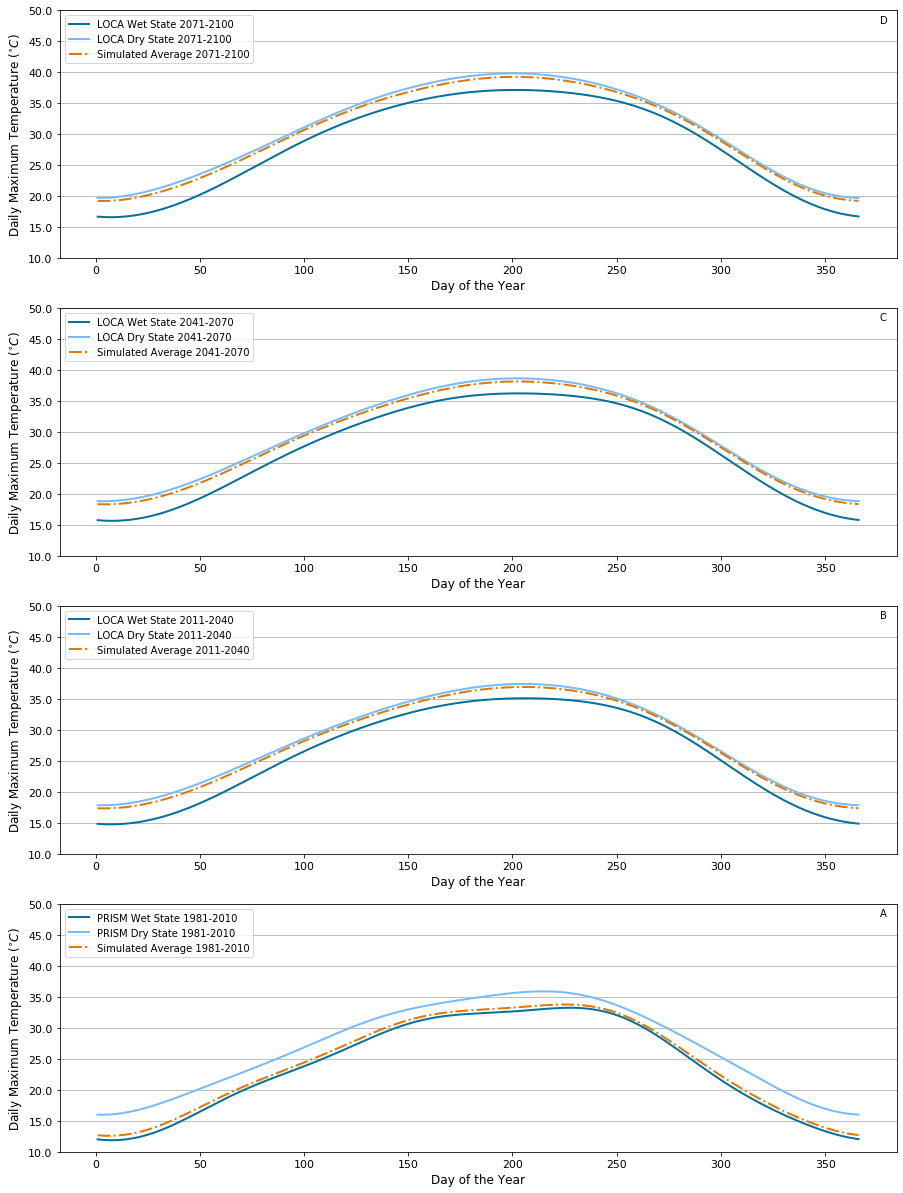

In [35]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
P3_WetData.plot( y="Tmax_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2071-2100",
                 ax=ax11 )
P3_DryData.plot( y="Tmax_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2071-2100",
                 ax=ax11 )
ax11.plot( DayYr, P3_SSTmax, color='xkcd:pumpkin', linewidth=2.0, label="Simulated Average 2071-2100",
           linestyle='dashdot' )
ax11.legend(prop=dict(size=11))
ax11.legend(loc="upper left")
ax11.grid(b=True, which="major", axis='y')
ax11.set_xlabel('Day of the Year', fontsize=12 )
ax11.set_ylabel('Daily Maximum Temperature ($^{\circ} C$)', fontsize=12)
ax11.set_ylim( ( 10.0, 50.0))
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
P2_WetData.plot( y="Tmax_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2041-2070",
                 ax=ax21 )
P2_DryData.plot( y="Tmax_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2041-2070",
                 ax=ax21 )
ax21.plot( DayYr, P2_SSTmax, color='xkcd:pumpkin', linewidth=2.0, label="Simulated Average 2041-2070",
           linestyle='dashdot' )
ax21.legend(prop=dict(size=11))
ax21.legend(loc="upper left")
ax21.grid(b=True, which="major", axis='y')
ax21.set_xlabel('Day of the Year', fontsize=12 )
ax21.set_ylabel('Daily Maximum Temperature ($^{\circ} C$)', fontsize=12)
ax21.set_ylim( ( 10.0, 50.0))
ax21.tick_params(axis='both', which='major', labelsize=11)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax21.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
P1_WetData.plot( y="Tmax_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2011-2040",
                 ax=ax31 )
P1_DryData.plot( y="Tmax_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2011-2040",
                 ax=ax31 )
ax31.plot( DayYr, P1_SSTmax, color='xkcd:pumpkin', linewidth=2.0, label="Simulated Average 2011-2040",
           linestyle='dashdot' )
ax31.legend(prop=dict(size=11))
ax31.legend(loc="upper left")
ax31.grid(b=True, which="major", axis='y')
ax31.set_xlabel('Day of the Year', fontsize=12 )
ax31.set_ylabel('Daily Maximum Temperature ($^{\circ} C$)', fontsize=12)
ax31.set_ylim( ( 10.0, 50.0))
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax31.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
DP_WetData.plot( y="Tmax_C", color='xkcd:ocean blue', linewidth=2.0, label="PRISM Wet State 1981-2010",
                 ax=ax41 )
DP_DryData.plot( y="Tmax_C", color='xkcd:sky blue', linewidth=2.0, label="PRISM Dry State 1981-2010",
                 ax=ax41 )
ax41.plot( DayYr, DP_SSTmax, color='xkcd:pumpkin', linewidth=2.0, label="Simulated Average 1981-2010",
           linestyle='dashdot' )
ax41.legend(prop=dict(size=11))
ax41.legend(loc="upper left")
ax41.grid(b=True, which="major", axis='y')
ax41.set_xlabel('Day of the Year', fontsize=12 )
ax41.set_ylabel('Daily Maximum Temperature ($^{\circ} C$)', fontsize=12)
ax41.set_ylim( ( 10.0, 50.0))
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax41.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Tmin

In [36]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_TMin_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_TMin_DC_WGMN3.svg'

In [37]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_TMin_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_TMin_DC_WGMN3.png'

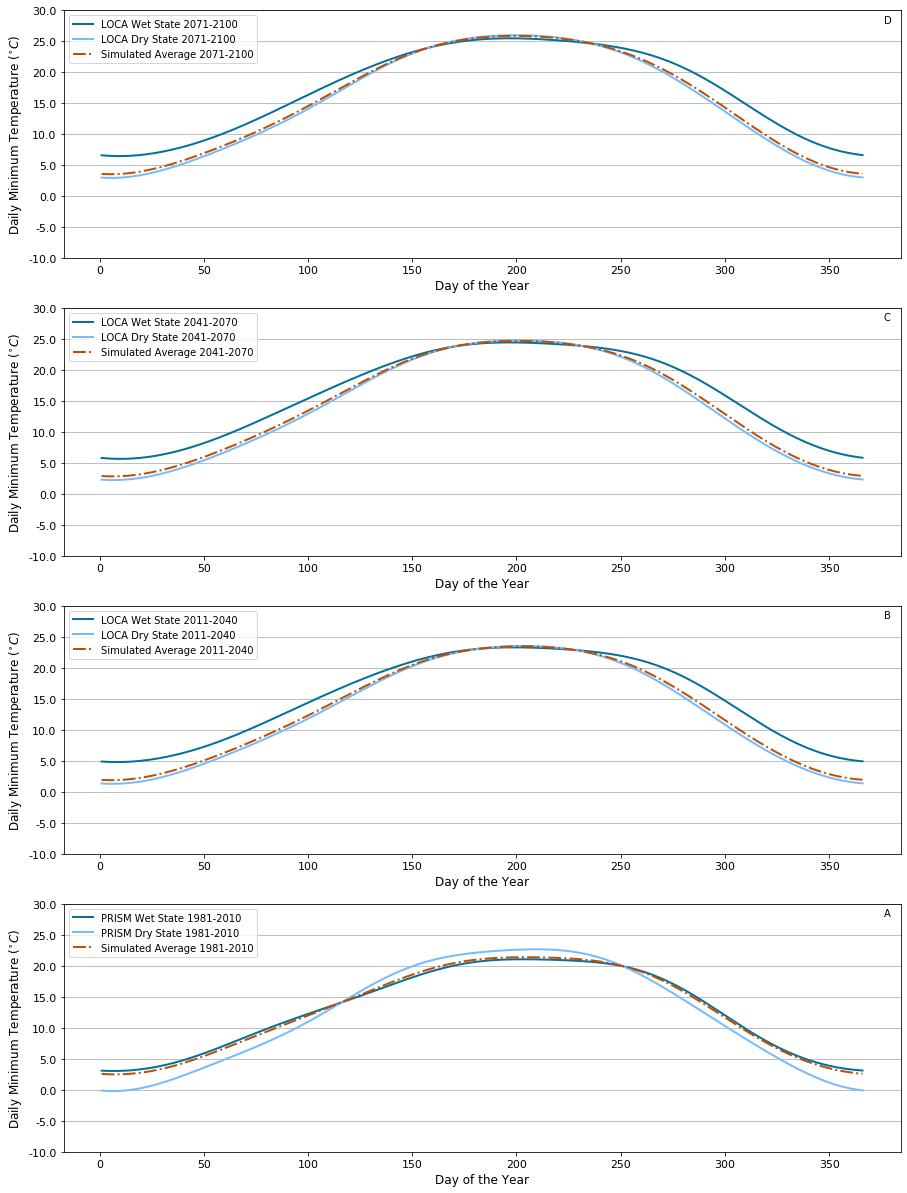

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
P3_WetData.plot( y="Tmin_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2071-2100",
                 ax=ax11 )
P3_DryData.plot( y="Tmin_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2071-2100",
                 ax=ax11 )
ax11.plot( DayYr, P3_SSTmin, color='xkcd:burnt orange', linewidth=2.0, label="Simulated Average 2071-2100",
           linestyle='dashdot' )
ax11.legend(prop=dict(size=11))
ax11.legend(loc="upper left")
ax11.grid(b=True, which="major", axis='y')
ax11.set_xlabel('Day of the Year', fontsize=12 )
ax11.set_ylabel('Daily Minimum Temperature ($^{\circ} C$)', fontsize=12)
ax11.set_ylim( ( -10.0, 30.0))
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
P2_WetData.plot( y="Tmin_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2041-2070",
                 ax=ax21 )
P2_DryData.plot( y="Tmin_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2041-2070",
                 ax=ax21 )
ax21.plot( DayYr, P2_SSTmin, color='xkcd:burnt orange', linewidth=2.0, label="Simulated Average 2041-2070",
           linestyle='dashdot' )
ax21.legend(prop=dict(size=11))
ax21.legend(loc="upper left")
ax21.grid(b=True, which="major", axis='y')
ax21.set_xlabel('Day of the Year', fontsize=12 )
ax21.set_ylabel('Daily Minimum Temperature ($^{\circ} C$)', fontsize=12)
ax21.set_ylim( ( -10.0, 30.0))
ax21.tick_params(axis='both', which='major', labelsize=11)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax21.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
P1_WetData.plot( y="Tmin_C", color='xkcd:ocean blue', linewidth=2.0, label="LOCA Wet State 2011-2040",
                 ax=ax31 )
P1_DryData.plot( y="Tmin_C", color='xkcd:sky blue', linewidth=2.0, label="LOCA Dry State 2011-2040",
                 ax=ax31 )
ax31.plot( DayYr, P1_SSTmin, color='xkcd:burnt orange', linewidth=2.0, label="Simulated Average 2011-2040",
           linestyle='dashdot' )
ax31.legend(prop=dict(size=11))
ax31.legend(loc="upper left")
ax31.grid(b=True, which="major", axis='y')
ax31.set_xlabel('Day of the Year', fontsize=12 )
ax31.set_ylabel('Daily Minimum Temperature ($^{\circ} C$)', fontsize=12)
ax31.set_ylim( ( -10.0, 30.0))
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax31.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
DP_WetData.plot( y="Tmin_C", color='xkcd:ocean blue', linewidth=2.0, label="PRISM Wet State 1981-2010",
                 ax=ax41 )
DP_DryData.plot( y="Tmin_C", color='xkcd:sky blue', linewidth=2.0, label="PRISM Dry State 1981-2010",
                 ax=ax41 )
ax41.plot( DayYr, DP_SSTmin, color='xkcd:burnt orange', linewidth=2.0, label="Simulated Average 1981-2010",
           linestyle='dashdot' )
ax41.legend(prop=dict(size=11))
ax41.legend(loc="upper left")
ax41.grid(b=True, which="major", axis='y')
ax41.set_xlabel('Day of the Year', fontsize=12 )
ax41.set_ylabel('Daily Minimum Temperature ($^{\circ} C$)', fontsize=12)
ax41.set_ylim( ( -10.0, 30.0))
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax41.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )